In [2]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Generate a synthetic dataset
# 1000 samples, 20 features, 2 classes (spam and non-spam)
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_classes=2,
    random_state=42
)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 82.00%

Confusion Matrix:
[[130  30]
 [ 24 116]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       160
           1       0.79      0.83      0.81       140

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



  CustomerID  Tenure  MonthlyCharges  TotalCharges        Contract  \
0   CUST0001      52          105.57       3271.81        One year   
1   CUST0002      15          103.02       6420.56  Month-to-month   
2   CUST0003      61           59.72       1711.88        One year   
3   CUST0004      21           86.81       4485.17        Two year   
4   CUST0005      24           40.50       5891.26        One year   

   PaymentMethod InternetService OnlineSecurity TechSupport Churn  
0    Credit card              No             No         Yes    No  
1    Credit card             DSL             No         Yes   Yes  
2   Mailed check              No            Yes          No    No  
3    Credit card     Fiber optic            Yes         Yes    No  
4  Bank transfer              No            Yes          No    No  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------        

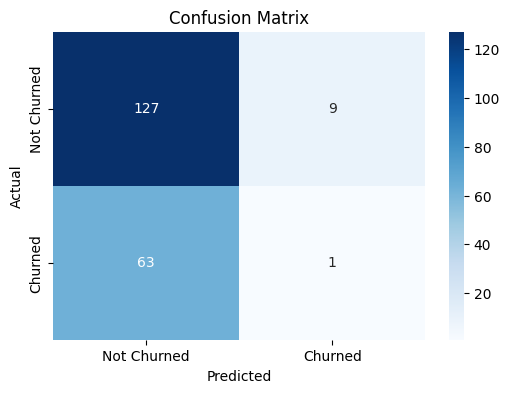

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("telecom_churn.csv")

# Explore the dataset
print(df.head())
print(df.info())

# Handle missing values
df = df.dropna()  # Drop missing values

# Drop the CustomerID column as it's not useful for prediction
if "CustomerID" in df.columns:
    df = df.drop(columns=["CustomerID"])

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variable
X = df.drop(columns=["Churn"])  # Features
y = df["Churn"]  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
